In [ ]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from pathlib import Path
import astropy.units as u
from astropy.convolution import convolve, Box1DKernel, Gaussian1DKernel

In [ ]:
%matplotlib inline

In [ ]:
for file_path in Path("/Users/nmearl/Downloads/at2020zso_efosc2_nicholas/").glob("*.asci"):
    data = Table.read(file_path, format="ascii")

    fig, ax = plt.subplots()
    ax.plot(data["col1"], data["col2"])

In [ ]:
not_tab = Table.read("/Users/nmearl/Downloads/AT2020zso_spectra/at2020zso_not_nicholas/AT2020zso_coadd.ascii", format='ascii', names=['wave', 'flux', 'flux_err'])
fig, ax = plt.subplots()

ax.plot(not_tab['wave'] / (1 + 0.0563), not_tab['flux'])

In [ ]:
xsh_raw_tab = Table.read("/Users/nmearl/Downloads/AT2020zso_spectra/20201211/AT2020zso_xsh_20201211_VIS_slit1_flux.dat", format='ascii')
rest_wave = xsh_raw_tab['col1'] / (1 + 0.0563)
flux = xsh_raw_tab['col2']
flux_err = xsh_raw_tab['col3']

conv_flux = convolve(flux, Gaussian1DKernel(1))

mask = (rest_wave > 6200) & (rest_wave < 7100)
fig, ax = plt.subplots(figsize=(20, 4))
# ax.plot(rest_wave[mask], flux[mask])
ax.errorbar(rest_wave[mask], conv_flux[mask], yerr=flux_err[mask], fmt='-')

Text(0, 0.5, 'Normalized Flux')

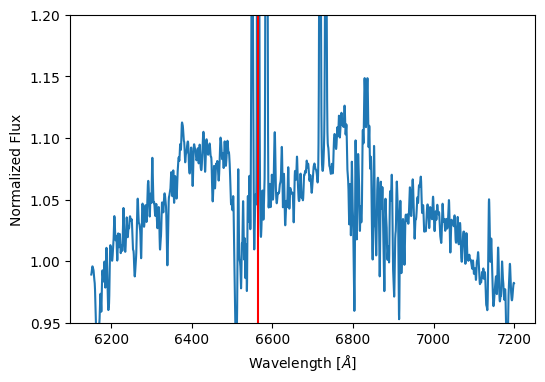

In [83]:
xsh_tab = Table.read("/Users/nmearl/Downloads/AT2020zso_spectra/20201211/AT2020zso_20201211_vis_norm_clip.dat", format='ascii')
fig, ax = plt.subplots(figsize=(6, 4))

rest_wave = xsh_tab['col1'] / (1 + 0.0563)
rest_vel = (rest_wave * u.AA).to(u.km / u.s, u.doppler_optical(6563 * u.AA))
flux = xsh_tab['col2']

conv_flux = convolve(flux, Gaussian1DKernel(6))

mask = (rest_wave > 6150) & (rest_wave < 7200)

ax.plot(rest_wave[mask], conv_flux[mask])
ax.axvline(6565, color='r')
# ax.axvline(0, color='r')
ax.set_ylim(0.95, 1.2)
ax.set_xlabel(r"Wavelength [$\AA$]")
ax.set_ylabel("Normalized Flux")
